In [8]:
# Importing libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading the dataset
df = pd.read_csv('mbti_1.csv')

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['posts'], df['type'], test_size=0.2, random_state=42)

# Converting text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [4]:
# Initializing and training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=21) 
knn_model.fit(X_train_tfidf, y_train)

# Predicting personality types on the test set
y_pred = knn_model.predict(X_test_tfidf)

In [5]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Printing results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.45994236311239195
Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.50      0.20      0.28        41
        ENFP       0.47      0.50      0.48       125
        ENTJ       0.82      0.32      0.46        44
        ENTP       0.68      0.30      0.41       135
        ESFJ       0.20      0.29      0.24         7
        ESFP       1.00      0.00      0.00         8
        ESTJ       0.33      0.14      0.20         7
        ESTP       1.00      0.33      0.50        15
        INFJ       0.38      0.58      0.46       288
        INFP       0.39      0.76      0.52       370
        INTJ       0.50      0.27      0.35       193
        INTP       0.71      0.39      0.50       293
        ISFJ       0.94      0.38      0.54        45
        ISFP       0.75      0.11      0.20        53
        ISTJ       0.92      0.25      0.39        44
        ISTP       0.81      0.19      0.31        67

    accuracy              

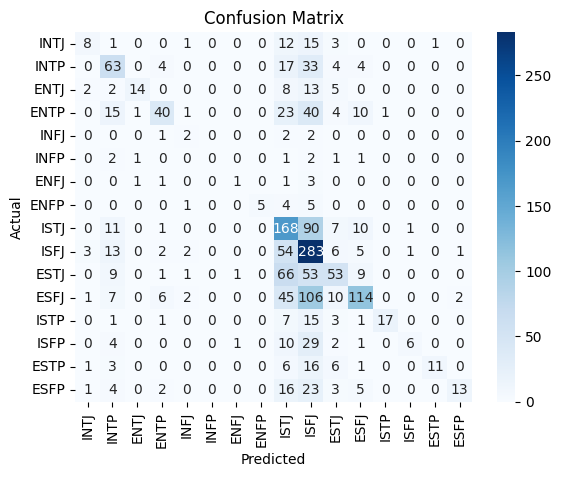

In [9]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

mbti_types = ['INTJ', 'INTP', 'ENTJ', 'ENTP', 'INFJ', 'INFP', 'ENFJ', 'ENFP', 'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ', 'ISTP', 'ISFP', 'ESTP', 'ESFP']

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mbti_types, yticklabels=mbti_types)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
def calculate_letter_off_metrics(actual, predicted):
    letter_off_counts = {i: 0 for i in range(1, 5)}
    incorrect_counts = {i: 0 for i in range(1, 5)}
    incorrect_count = 0

    for act, pred in zip(actual, predicted):
        differences = sum(1 for a, p in zip(act, pred) if a != p)
        
        if 1 <= differences <= 4:
            letter_off_counts[differences] += 1
            if act != pred:
                incorrect_counts[differences] += 1
        
        if act != pred:
            incorrect_count += 1

    total_predictions = len(actual)
    metrics = {
        "Letters Off": [],
        "Percentage of Incorrect": [],
        "Percentage of Total": []
    }

    for i in range(1, 5):
        incorrect_percentage = (incorrect_counts[i] / incorrect_count) * 100 if incorrect_count > 0 else 0
        total_percentage = (letter_off_counts[i] / total_predictions) * 100
        metrics["Letters Off"].append(f"{i} Letter{'s' if i > 1 else ''} Off")
        metrics["Percentage of Incorrect"].append(incorrect_percentage)
        metrics["Percentage of Total"].append(total_percentage)

    return pd.DataFrame(metrics)

metrics_df = calculate_letter_off_metrics(y_test, y_pred)
print(metrics_df.to_string(index=False))

  Letters Off  Percentage of Incorrect  Percentage of Total
 1 Letter Off                53.681964            28.991354
2 Letters Off                32.870864            17.752161
3 Letters Off                11.739594             6.340058
4 Letters Off                 1.707577             0.922190
